In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix

from time import thread_time_ns

In [2]:
df = pd.read_csv('asus_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4693173 entries, 0 to 4693172
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   laptop     object 
 1   load       int64  
 2   code_type  object 
 3   timestamp  float64
 4   llcm       int64  
 5   l2ch       int64  
 6   l1ch       int64  
 7   stalls     int64  
 8   label      object 
dtypes: float64(1), int64(5), object(3)
memory usage: 322.3+ MB


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4693173 entries, 0 to 4693172
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   laptop     object 
 1   load       int64  
 2   code_type  object 
 3   timestamp  float64
 4   llcm       int64  
 5   l2ch       int64  
 6   l1ch       int64  
 7   stalls     int64  
 8   label      object 
dtypes: float64(1), int64(5), object(3)
memory usage: 322.3+ MB


In [5]:
df.describe()

,load,timestamp,llcm,l2ch,l1ch,stalls
count,4.693173e+06,4.693173e+06,4.693173e+06,4.693173e+06,4.693173e+06,4.693173e+06
mean,2.996028e+00,1.427924e+02,1.127409e+04,4.710239e+03,1.939068e+05,2.202454e+06
std,1.734338e+00,1.104816e+02,2.893191e+04,1.371648e+04,4.152132e+05,1.132267e+06
min,0.000000e+00,1.007000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.340001e+01,1.564000e+03,2.000000e+00,1.530000e+02,2.293989e+06
50%,4.000000e+00,1.109370e+02,5.237000e+03,3.000000e+01,1.955500e+04,2.345484e+06
75%,4.000000e+00,2.178290e+02,1.003700e+04,1.268000e+03,5.539900e+04,2.664638e+06
max,4.000000e+00,4.784250e+02,1.375219e+06,9.661200e+04,1.871922e+06,6.319898e+08


In [6]:
samples=df.drop(columns=['label', 'code_type', 'timestamp', 'load', 'laptop'])
#samples['laptop'].replace(['lenovo', 'asus', 'dell'], [1, 2, 3], inplace=True)
#samples['laptop'] = samples['laptop'].astype("int64")
samples

,llcm,l2ch,l1ch,stalls
0,3779,44,459,892017
1,5877,0,70,1421591
2,3346,4,21,1593223
3,5146,3,73,2206441
4,5933,0,63,2004128
...,...,...,...,...
4693168,1875,2242,9068,324410
4693169,1639,1728,6994,280136
4693170,662,662,2785,125328
4693171,0,0,0,0


In [7]:
labels = df['label'].replace(['no_attack', 'attack'], [0, 1])
labels = labels.astype('int64')
labels

0          1
1          1
2          1
3          1
4          1
          ..
4693168    0
4693169    0
4693170    0
4693171    0
4693172    0
Name: label, Length: 4693173, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(samples, labels, train_size = 0.5, random_state= 33, shuffle = True)

In [9]:
def evaluate(model):
    # https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    n = tn + fp + fn + tp
    return f'accuracy: {(tp+tn)*100.0/n}%\nfalse positives: {fp*100.0/n}%\nfalse negatives: {fn*100.0/n}%'

In [10]:
log_reg_model = LogisticRegression(random_state=33)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=33)

In [11]:
log_reg_model.score(X_test, y_test)

0.9931206471356059

In [12]:
print(evaluate(log_reg_model))

accuracy: 99.31206471356059%
false positives: 0.6794548849030528%
false negatives: 0.008480401536358977%


In [13]:
dec_tree_model = DecisionTreeClassifier(max_depth = 5, random_state = 33)
dec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=33)

In [14]:
dec_tree_model.score(X_test, y_test)

0.9995256941251273

In [15]:
print(evaluate(dec_tree_model))

accuracy: 99.95256941251273%
false positives: 0.04176278143533566%
false negatives: 0.005667806051938411%


[Text(0.4717741935483871, 0.9166666666666666, 'x[0] <= 3006.5\ngini = 0.426\nsamples = 2346586\nvalue = [722948, 1623638]'),
 Text(0.24193548387096775, 0.75, 'x[0] <= 2917.5\ngini = 0.002\nsamples = 638820\nvalue = [638195, 625]'),
 Text(0.16129032258064516, 0.5833333333333334, 'x[0] <= 2581.5\ngini = 0.001\nsamples = 637832\nvalue = [637499, 333]'),
 Text(0.0967741935483871, 0.4166666666666667, 'x[3] <= 2795565.0\ngini = 0.0\nsamples = 634244\nvalue = [634140, 104]'),
 Text(0.06451612903225806, 0.25, 'x[0] <= 2402.5\ngini = 0.0\nsamples = 634238\nvalue = [634140, 98]'),
 Text(0.03225806451612903, 0.08333333333333333, 'gini = 0.0\nsamples = 630735\nvalue = [630676, 59]'),
 Text(0.0967741935483871, 0.08333333333333333, 'gini = 0.022\nsamples = 3503\nvalue = [3464, 39]'),
 Text(0.12903225806451613, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.22580645161290322, 0.4166666666666667, 'x[2] <= 1982.5\ngini = 0.12\nsamples = 3588\nvalue = [3359, 229]'),
 Text(0.1935483870967742, 

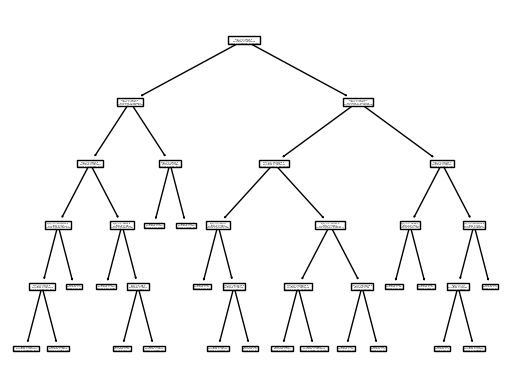

In [16]:
plot_tree(dec_tree_model)

In [17]:
xgb_model = XGBClassifier(max_depth=3, random_state = 33, n_estimators = 15)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=15, n_jobs=None,
              num_parallel_tree=None, random_state=33, ...)

In [18]:
xgb_model.score(X_test, y_test)

0.999451970031369

In [19]:
print(evaluate(xgb_model))

accuracy: 99.9451970031369%
false positives: 0.035072213389062495%
false negatives: 0.019730783474041235%


In [20]:
cb_model = CatBoostClassifier(n_estimators = 15, random_state = 33, max_depth = 3)
cb_model.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.3149792	total: 115ms	remaining: 1.61s
1:	learn: 0.1730286	total: 166ms	remaining: 1.07s
2:	learn: 0.1010933	total: 215ms	remaining: 861ms
3:	learn: 0.0609260	total: 264ms	remaining: 727ms
4:	learn: 0.0386850	total: 310ms	remaining: 621ms
5:	learn: 0.0246355	total: 357ms	remaining: 535ms
6:	learn: 0.0160709	total: 408ms	remaining: 466ms
7:	learn: 0.0107052	total: 461ms	remaining: 404ms
8:	learn: 0.0074136	total: 516ms	remaining: 344ms
9:	learn: 0.0054121	total: 570ms	remaining: 285ms
10:	learn: 0.0038517	total: 623ms	remaining: 227ms
11:	learn: 0.0027336	total: 677ms	remaining: 169ms
12:	learn: 0.0022532	total: 729ms	remaining: 112ms
13:	learn: 0.0016630	total: 781ms	remaining: 55.8ms
14:	learn: 0.0011884	total: 831ms	remaining: 0us


In [21]:
cb_model.score(X_test, y_test)

0.9998585179241171

In [22]:
print(evaluate(cb_model))

accuracy: 99.98585179241171%
false positives: 0.011974838350336041%
false negatives: 0.0021733692379613456%


In [23]:
labels.sum()

3247867

In [24]:
len(labels)

4693173

In [25]:
labels.sum()*100.0/len(labels) # percentage of attack samples

69.20407579264604

In [26]:
start = thread_time_ns()
log_reg_model.predict(X_test)
stop = thread_time_ns()
log_reg_time = (stop - start)/len(y_test)
print(f'average time for log_reg_model: {log_reg_time}ns,\nnumber of samples: {len(y_test)}')

average time for log_reg_model: 15.44459634354064ns,
number of samples: 2346587


In [27]:
start = thread_time_ns()
dec_tree_model.predict(X_test)
stop = thread_time_ns()
dec_tree_time = (stop - start)/len(y_test)
print(f'average time for dec_tree_model: {dec_tree_time}ns,\nnumber of samples: {len(y_test)}')

average time for dec_tree_model: 27.294051744086197ns,
number of samples: 2346587


In [28]:
start = thread_time_ns()
cb_model.predict(X_test)
stop = thread_time_ns()
cb_time = (stop - start)/len(y_test)
print(f'average time for cb_model: {cb_time}ns,\nnumber of samples: {len(y_test)}')

average time for cb_model: 66.61351784527912ns,
number of samples: 2346587


In [29]:
code_types = ['attack', 'no_flush', 'random', 'attack_ntmp', 'stream', 'rh4', 'rh8', 'rh9', 'rh10', 'rh20', 'double_sided']
n = df.index.size
s = 0
for ct in code_types:
    m = df.loc[df['code_type'] == ct].index.size
    print(f'{ct}: {m*100/n}%')
    s += m*100/n
print(f'total = {s}')
print(f'samples: {n}')

attack: 6.5999697858996464%
no_flush: 5.9214309807032475%
random: 13.050147522795346%
attack_ntmp: 10.372215130360633%
stream: 11.824345703855366%
rh4: 8.75132879184296%
rh8: 8.723905980026732%
rh9: 8.753523469090101%
rh10: 8.31377833291038%
rh20: 7.485511401348299%
double_sided: 10.203842901167292%
total = 100.0
samples: 4693173
